# Model Training [ Result 2 ] -- Part 1 
# Target variable --> Average score
### 1.1 Import Data and Required Packages  
Importing Pandas, Numpy, Matplotlib, Seaborn

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error

Import the CSV Data as Pandas DataFrame

In [31]:
df = pd.read_csv('stud_data.csv')

Show Top 5 Records

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df1=df.copy()

df1['average'] =( (df['math_score'] + df['reading_score'] + df['writing_score'])/3 ).round(0)
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [34]:
features = list( df1.columns ) 
# features.remove('average') 
# features.remove('math_score') 
features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score',
 'average']

In [35]:
# Encoding Categorical Features

encoded_df = pd.get_dummies(df1[features])
list(encoded_df.columns)
#encoded_df.shape

['math_score',
 'reading_score',
 'writing_score',
 'average',
 'gender_female',
 'gender_male',
 'race_ethnicity_group A',
 'race_ethnicity_group B',
 'race_ethnicity_group C',
 'race_ethnicity_group D',
 'race_ethnicity_group E',
 "parental_level_of_education_associate's degree",
 "parental_level_of_education_bachelor's degree",
 'parental_level_of_education_high school',
 "parental_level_of_education_master's degree",
 'parental_level_of_education_some college',
 'parental_level_of_education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none']

In [36]:
encoded_df.head()

,math_score,reading_score,writing_score,average,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,...,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,73.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,82.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,93.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,49.0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,76.0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


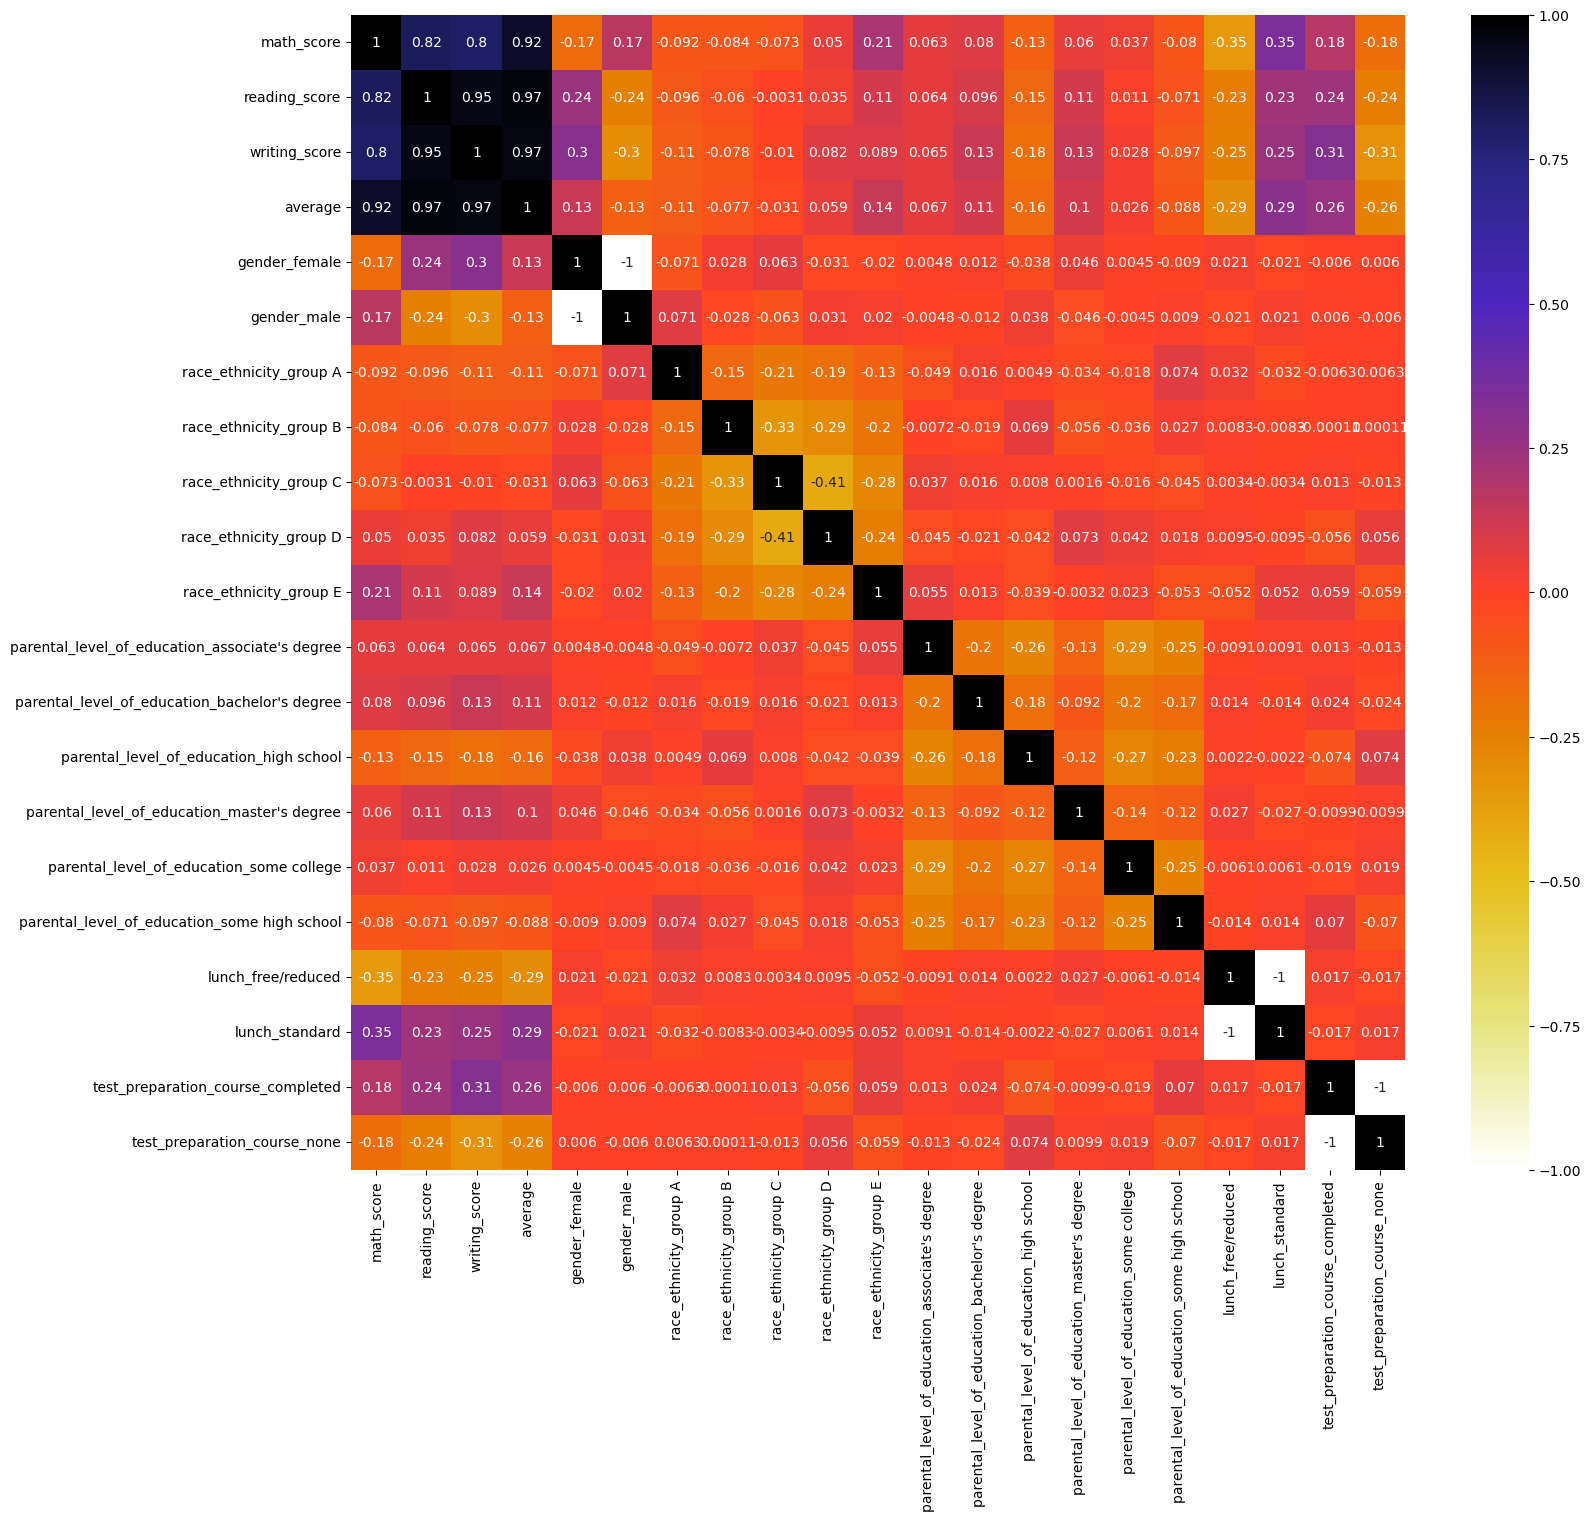

In [37]:
import seaborn as sns

plt.figure(figsize=(17,15))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Feature removal- With Correlation  
In this step we will be removing the features which are highly correlated

In [38]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(encoded_df, 0.8)
len(set(corr_features))

3

In [40]:
corr_features

{'average', 'reading_score', 'writing_score'}

### Preparing X and Y variables

In [41]:
X = encoded_df
X= X.drop(['average','writing_score','reading_score'],axis=1)
# Y = df1.average
Y = encoded_df.average

In [60]:
X

,math_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [43]:
Y

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: average, Length: 1000, dtype: float64

In [61]:
type(Y)

pandas.core.series.Series

## Linear Regression

In [44]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((700, 18), (300, 18))

In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.get_params()
l1.fit(X_train,Y_train)
print(l1.intercept_)
print(l1.coef_)

7.994591947410257
[ 0.90981575  4.05300629 -4.05300629  0.20310954  0.18476639  0.66537645
  0.86437692 -1.9176293   0.10605143  0.73833057 -0.71990538  0.95277536
 -0.59880623 -0.47844575  0.61294454 -0.61294454  1.16684552 -1.16684552]


In [46]:
coef_df=pd.DataFrame(l1.coef_,index=X.columns,columns=['Coefficient'])
print(coef_df)

                                                Coefficient
math_score                                         0.909816
gender_female                                      4.053006
gender_male                                       -4.053006
race_ethnicity_group A                             0.203110
race_ethnicity_group B                             0.184766
race_ethnicity_group C                             0.665376
race_ethnicity_group D                             0.864377
race_ethnicity_group E                            -1.917629
parental_level_of_education_associate's degree     0.106051
parental_level_of_education_bachelor's degree      0.738331
parental_level_of_education_high school           -0.719905
parental_level_of_education_master's degree        0.952775
parental_level_of_education_some college          -0.598806
parental_level_of_education_some high school      -0.478446
lunch_free/reduced                                 0.612945
lunch_standard                          

                                                Coefficient
gender_male                                       -4.053006
race_ethnicity_group E                            -1.917629
test_preparation_course_none                      -1.166846
parental_level_of_education_high school           -0.719905
lunch_standard                                    -0.612945
parental_level_of_education_some college          -0.598806
parental_level_of_education_some high school      -0.478446
parental_level_of_education_associate's degree     0.106051
race_ethnicity_group B                             0.184766
race_ethnicity_group A                             0.203110
lunch_free/reduced                                 0.612945
race_ethnicity_group C                             0.665376
parental_level_of_education_bachelor's degree      0.738331
race_ethnicity_group D                             0.864377
math_score                                         0.909816
parental_level_of_education_master's deg

<AxesSubplot:>

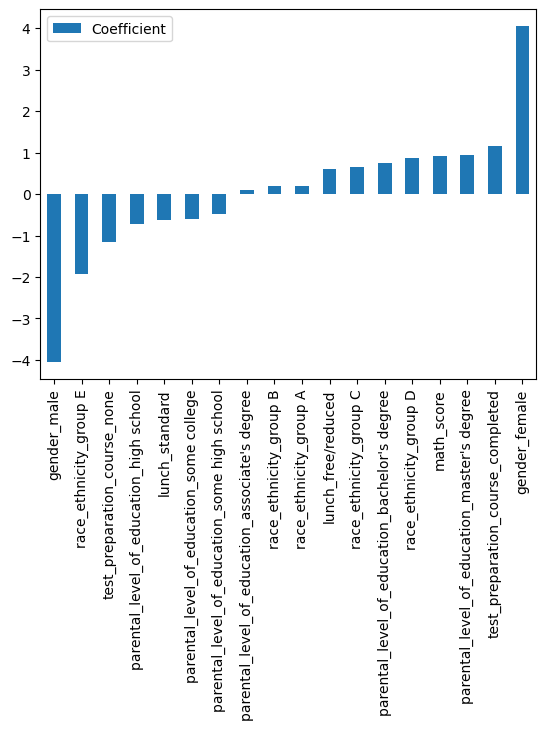

In [47]:
print(coef_df.sort_values(by='Coefficient'))
coef_df.sort_values(by='Coefficient').plot(kind='bar')

In [48]:
predictions=l1.predict(X_test) 
pred_df=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df['Predictons']=predictions   
pred_df

,average,Predictons
521,87.0,93.832469
737,64.0,61.633583
740,75.0,76.549763
660,75.0,70.780620
411,82.0,78.403574
...,...,...
468,83.0,83.366405
935,64.0,67.340358
428,59.0,62.250372
7,41.0,39.366275


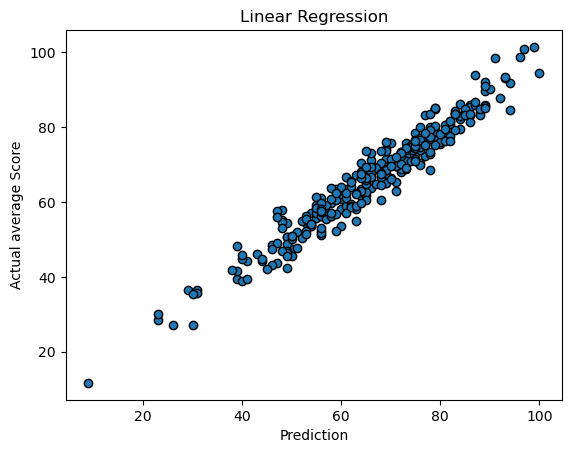

In [49]:
plt.scatter(Y_test,predictions,edgecolors='black')
plt.ylabel('Actual average Score')
plt.xlabel("Prediction")
plt.title("Linear Regression")
plt.show()

In [62]:
# sns.distplot(Y_test-predictions)
# plt.show()

In [51]:
from sklearn.metrics import r2_score
print(" Accuracy of the Linear Regression model is", r2_score(Y_test,predictions)*100)

print("\n Mean Squared Error:", mean_squared_error(Y_test,predictions))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,predictions)))

 Accuracy of the Linear Regression model is 94.4168543374499

 Mean Squared Error: 12.594392367483037

 Root Mean Squared Error: 3.5488578962087276


1 Mean Squared Error (MSE):  
MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates a better model fit.  

2 Root Mean Squared Error (RMSE):  
RMSE is the square root of the MSE, which gives a measure of the average magnitude of the error. A lower RMSE indicates a better model fit.  

3 R-squared (R2):  
R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better model fit.  

In [52]:
### Building Decision Tree Regressor

from sklearn import tree
tree_clf=tree.DecisionTreeRegressor(criterion='squared_error',random_state=42,max_depth=4)
tree_clf.fit(X_train,Y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

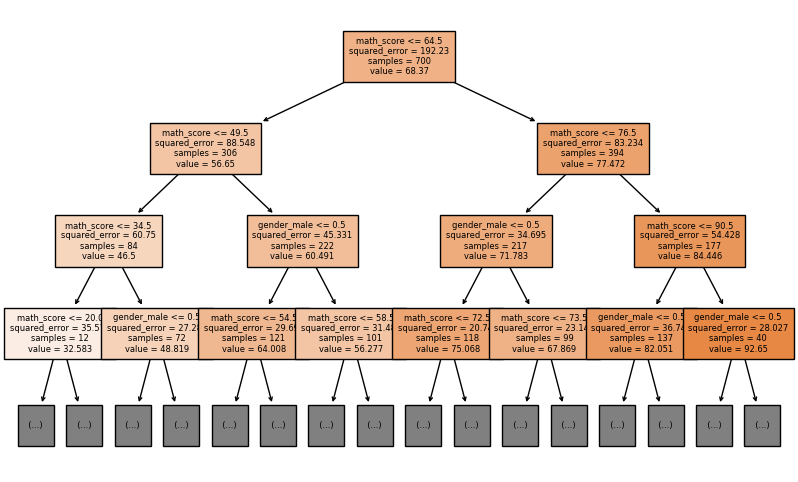

In [53]:
fig,ax=plt.subplots(figsize=(10,6))
tree.plot_tree(tree_clf,ax=ax,feature_names=X.columns,fontsize=6,filled=True,max_depth=3)
plt.show()

In [54]:
pdt=tree_clf.predict(X_test).round(2)
pdt

array([97.06, 58.81, 78.55, 72.91, 78.55, 78.55, 66.43, 58.81, 78.55,
       52.26, 45.28, 34.7 , 73.24, 50.7 , 78.55, 73.24, 52.26, 52.26,
       50.7 , 66.21, 78.55, 50.7 , 50.7 , 50.7 , 78.55, 78.55, 66.43,
       50.7 , 34.7 , 50.7 , 59.64, 66.43, 59.64, 72.91, 78.55, 50.7 ,
       78.55, 73.24, 78.92, 22.  , 78.55, 66.43, 66.43, 58.81, 78.55,
       66.21, 72.91, 34.7 , 78.55, 78.92, 66.43, 66.21, 78.55, 50.7 ,
       73.24, 73.24, 78.55, 52.26, 78.55, 86.29, 45.28, 73.24, 86.29,
       66.21, 78.55, 73.24, 66.21, 59.64, 66.21, 86.29, 66.43, 86.29,
       52.26, 50.7 , 59.64, 78.55, 86.29, 52.26, 50.7 , 52.26, 59.64,
       45.28, 78.55, 66.21, 59.64, 66.21, 73.24, 66.21, 86.29, 34.7 ,
       78.55, 97.06, 66.43, 66.43, 22.  , 72.91, 59.64, 66.21, 73.24,
       66.21, 66.43, 66.43, 66.43, 66.21, 66.43, 66.43, 52.26, 72.91,
       73.24, 50.7 , 34.7 , 73.24, 52.26, 50.7 , 78.92, 59.64, 45.28,
       52.26, 66.43, 78.55, 58.81, 66.21, 78.55, 66.21, 66.21, 66.43,
       78.92, 73.24,

In [55]:
pred_df1=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df1['Predictons']=pdt   
pred_df1

,average,Predictons
521,87.0,97.06
737,64.0,58.81
740,75.0,78.55
660,75.0,72.91
411,82.0,78.55
...,...,...
468,83.0,86.29
935,64.0,66.43
428,59.0,66.43
7,41.0,45.28


In [1]:
# plt.scatter(Y_test,pdt,edgecolors='black')
# plt.ylabel('Actual average Score')
# plt.xlabel("Prediction")
# plt.title("Decision Tree Regressor")
# plt.show()

In [57]:
print(" Accuracy of the Decision Tree Regressor model is ",r2_score(Y_test,pdt)*100 )

print("\n Mean Squared Error:", mean_squared_error(Y_test,pdt))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,pdt)))

 Accuracy of the Decision Tree Regressor model is  89.10298417044825

 Mean Squared Error: 24.581356333333336

 Root Mean Squared Error: 4.957958887822017


C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


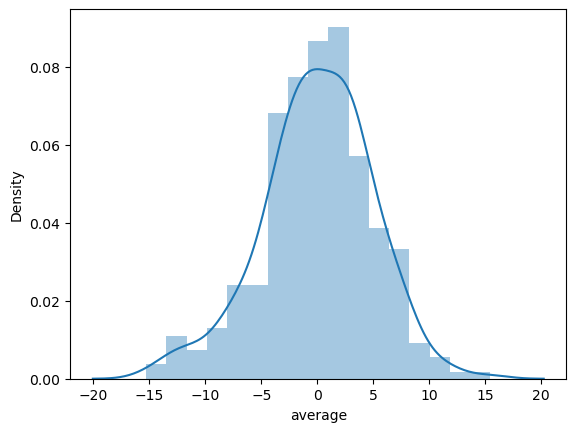

In [58]:
sns.distplot(Y_test-pdt)
plt.show()